# Solution for choosing appropriate nodes for MLP Regressor

## Import pandas from python library for dataset-CSV file imoprts

In [74]:
import pandas as pd
df = pd.read_csv('regression2(1).csv', names=['x1','x2','y'])
df

In [4]:
df.describe()

,x1,x2,y
count,500.000000,500.000000,500.000000
mean,0.233919,-0.013329,9.361402
std,2.900994,2.889343,47.613754
min,-4.968200,-4.977100,-138.930000
25%,-2.285350,-2.511675,-23.345750
50%,0.327460,-0.121155,5.001250
75%,2.706875,2.479325,42.488250
max,4.989400,5.093000,142.150000


### Import necessary python Libraries for creating the Multi-layer perceptron used in the MLPRegression task

In [76]:
# Import libraries for training and testing
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler

#### Creating an array of dependants and independents variables


In [77]:
import pandas as pd
df = pd.read_csv('regression2(1).csv', names=['x1','x2','y'])
# creates vector of columns
target_column = ['y']
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
X = df[predictors].values
y = df[target_column].values

# get column from first and second index
X = df.iloc[:,:2]
# get columns from third column
y = df.iloc[:,2:]

## Splitting and Training the data

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X_train.shape)
print(y_test.shape)

(350, 2)
(150, 1)


### Scaling the features on the trainning data to allow for normalization as recommended by sklearn documentation
#### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [79]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

### Create the MLP Regressor Model

#### MLPRegressor trains iteratively, at each time step the partial derivatives of the loss function with respect to the model parameters are computed to update  the parameters. It can also have a regularization term added to the loss function that shrinks model parameters to prevent overfitting.  The model parameters used in this task is taken from the SKlearn documentation https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html.

In [83]:
mlp=MLPRegressor(activation='logistic', solver ='sgd', learning_rate='constant', hidden_layer_sizes=(50,), max_iter=1700, random_state=1)
mlp.fit(X_train, y_train)
# solvers 'lbfgs', 'adam'.
#activation{‘identity’, ‘logistic’, ‘tanh’,
mlp

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(activation='logistic', hidden_layer_sizes=(50,), max_iter=1700,
             random_state=1, solver='sgd')

## Generalization Error:
### The generalization error produced in this result, using the above parameters in creating the MLP Regressor tend to be low compare to other parameters.  I have also provide two curves below to demonstrate the impact of the two activation function on the model.

In [84]:
print('Accuracy training : {:.2f}'.format(mlp.score(X_train,y_train)))
print('Accuracy testing : {:.2f}'.format(mlp.score(X_test,y_test)))
print("Loss : ", mlp.loss_)

Accuracy training : 0.76
Accuracy testing : 0.72
Loss :  279.35922246249146


## Evaluation of Performance
### The mean Absolute Error:
#### The absolute error is the absolute value of the difference between the predicted value and the actual value,  It takes the average of all the error from every sample in a dataset and gives the output.  MAE tells us how big of an error we can expect from the prediction on average. the result in the error shows the prediction has 18.8 average error
### The mean squared error: 
#### The metric square the errors in the predictions before calculating their mean and then taking the square root of the mean, it then arrive at a measure of the size of the error that gives more weight to the large but infrequent errors than the mean. it tend to provide a balance between overfitting and underfitting. The lower the value the better. In this task using the stated parameter in the mlp regressor as used above provides the understated value of 558.54 and in comparison to using other parameters, this gives a lower value.
### The coefficient of determination:
#### This metric gives an indication of how good a model fits a given dataset. The R squared value lies between 0 and 1 where 0 indicates that this model doesn't fit the given data and 1 indicates that the model fits perfectly to the dataset provided. The result of 0.757 or 0.76 shows that 76% of the data fits the model. 

In [62]:
from sklearn.metrics import r2_score
from sklearn import metrics

mae = metrics.mean_absolute_error(y_train, mlp.predict(X_train))
mse = metrics.mean_squared_error(y_train, mlp.predict(X_train))
rsq = metrics.r2_score(y_train, mlp.predict(X_train))

print('Mean Absollute Error:', mae)
print('Mean Squared Error:', mse)
print('Coefficient of Determination:', rsq)
print("Loss : ", mlp.loss_)

Mean Absollute Error: 18.834778731549623
Mean Squared Error: 558.5376811351946
Coefficient of Determination: 0.7568018501394526
Loss :  279.35922246249146


In [63]:
mae = metrics.mean_absolute_error(y_test, mlp.predict(X_test))
mse = metrics.mean_squared_error(y_test, mlp.predict(X_test))
rsq = metrics.r2_score(y_test, mlp.predict(X_test))

print('Mean Absollute Error:', mae)
print('Mean Squared Error:', mse)
print('Coefficient of Determination:', rsq)

Mean Absollute Error: 20.067259345982237
Mean Squared Error: 603.2929394883461
Coefficient of Determination: 0.723376289449297


### Model predictions of trained data with accuracy level

In [ ]:
print('Accuracy training : {:.3f}'.format(mlp.score(X_train,y_train)))
print('Accuracy testing : {:.3f}'.format(mlp.score(X_test,y_test)))
y_train_predicted = mlp.predict(X_train)
print(y_train_predicted)

## Plot the 'loss_curve_'  protery on model to see how well the model is learning over the iterations.
### Using logistic activation function, with 50 nodes and 1700 epochs(see more explantion above)

<AxesSubplot:>

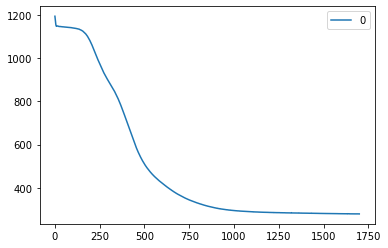

In [67]:
pd.DataFrame(mlp.loss_curve_).plot()

## For comparison purpose of the impact of different activation function
### Using tanh activation function.
#### The below curve is met to compare the Loss curve given different activation function, here tanh activation function was used, tanh appears to reduced the generalization error more, given the same nodes and epochs. This is depicted in the curve been flattened.  Also the Accuracy training and testing slightly improved compare to using logistic activation function.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy training : 0.77
Accuracy testing : 0.74
Loss :  269.4168739458424
Mean Absollute Error: 20.067259345982237
Mean Squared Error: 603.2929394883461
Coefficient of Determination: 0.723376289449297


<AxesSubplot:>

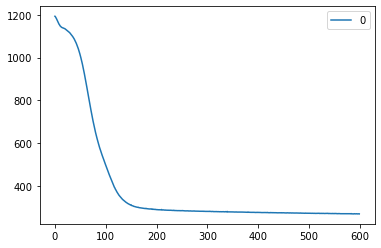

In [69]:
mlp=MLPRegressor(activation='tanh', solver ='sgd', learning_rate='constant', hidden_layer_sizes=(50,), max_iter=1700, random_state=1)
mlp.fit(X_train, y_train)
# solvers 'lbfgs', 'adam'.
#activation{‘identity’, ‘logistic’, ‘tanh’,
mlp
print('Accuracy training : {:.2f}'.format(mlp.score(X_train,y_train)))
print('Accuracy testing : {:.2f}'.format(mlp.score(X_test,y_test)))
print("Loss : ", mlp.loss_)
print('Mean Absollute Error:', mae)
print('Mean Squared Error:', mse)
print('Coefficient of Determination:', rsq)
pd.DataFrame(mlp.loss_curve_).plot()


## Explanation of Methodology and justification of Choice of Model

All the modules used in modelling the MLPRegressor was imported from python library. I started by importing the data set. This data was then divided into two set, 70% for training and 30% for testing. Thereafter the Dataset features were scaled as recommended by Sklearn API documentation. 
The MLPRegressor was created using the default parameters from the Sklearn documentation. 

Solver{‘lbfgs’, ‘sgd’, ‘adam’}.

In training the model I used all the solvers  above in the documentation  to observe which one will give the best result.
The solver which updates weights values that minimize the loss function in batches among other solver was the “stochastic gradient descent(Sgd).
The “Sgd”  with maximum iteration(epochs) of 1800, optimises the  loss function( seen  graph above).  Sgd when compared to other solver appears to be faster to converge in comparison to other solvers.  In search of the number of nodes after using various numbers, the following gave the same and a better result: 

50 node at an epochs of 1700 or
100 nodes at an epoch of 1800

The generalization error (see graph above) was the more reduced at using 50 nodes with epochs of 1700.

Activation {‘identity’, ‘logistic’, ‘tanh’},

Activation function for the hidden layer used in this task were logistics and tanh, the two was used for comparison purpose and produced a better comparable result to other activation function. Tanh appears to reduce further the generalization error with slightly higher accuracy(see graph above).
